In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
#import lightgbm as lgb

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
#from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [4]:
# Code starts here
train= pd.read_csv('train.csv')
X = train.drop(['Id','Cover_Type'], axis=1)
y= train['Cover_Type']
X.head()

train.isnull().sum()

train.describe()
X.shape

# Code ends here.

(9072, 54)

### EDA & Data Preprocessing

- The target is the only categorical feature consisting of 7 classes and all the other features are continuous. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D51C976188>]],
      dtype=object)

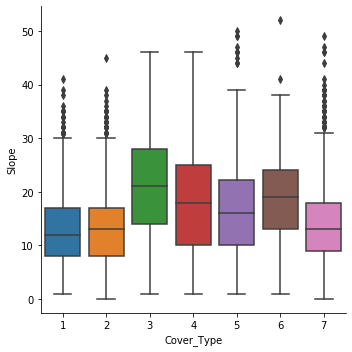

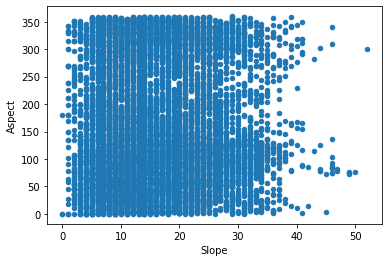

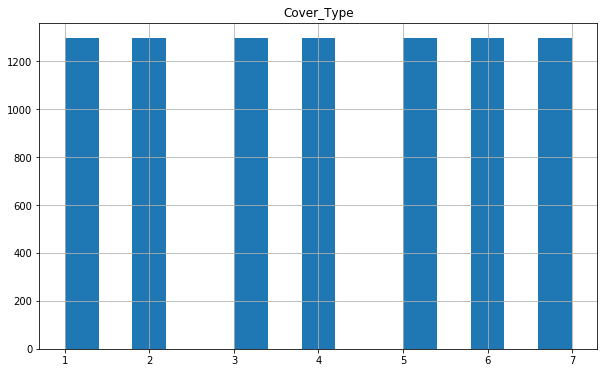

In [4]:
# Code starts here
sns.catplot(x='Cover_Type', y='Slope', kind='box', data=train) #, aspect=2.5, height=5
# sns.catplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology', kind='box', data=train) #, aspect=2.5, height=5
# sns.catplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology', kind='box', data=train) #, aspect=2.5, height=5
# sns.catplot(x='Cover_Type', y='Elevation', kind='box', data=train) #, aspect=2.5, height=5

# #sns.catplot(x='Cover_Type', y='Elevation', kind='swarm', data=train) #, aspect=2.5, height=5

train.plot.scatter(x='Slope',y='Aspect')

#train.corr()
train.hist(column='Cover_Type',bins=15, figsize=(10,6))
#sns.distplot(train['Elevation'])
# Code ends here

In [92]:
#X= (X - X.mean())/ X.std()
#X = X.drop(['Wilderness_Area4','Hillshade_9am'],axis=1)
# X.head()
# f,ax = plt.subplots(figsize=(24, 18))
# sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [5]:


X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2744,96,17,30,-7,458,245,214,92,351,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2504,103,8,30,6,404,234,230,127,1510,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2311,30,7,0,0,1230,218,226,143,150,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2710,191,26,443,-45,1209,210,249,158,939,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2802,91,11,540,18,1699,237,223,115,1084,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Feature Selection and Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different feature selection techniques like wrapper methods, PCA and try using hyperparameter tuning to find the parameters that give the best accuracy.

In [11]:
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.svm import SVC

# X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.3,random_state=0)

# scaler= StandardScaler()


# nof_list=[10,15,20,25,30,35,40,45,50,54]
# high_score=0
# nof=0

# for n in nof_list:
#     #model = OneVsRestClassifier(SVC())
#     #model = LogisticRegression()
    
#     model = LogisticRegression()
#     ovr = OneVsRestClassifier(model)
    
#     rfe = RFE(ovr, n)
#     X_train_rf = rfe.fit_transform(X_train, y_train)
#     X_test_rf = rfe.transform(X_test)
#     ovr.fit(X_train_rf,y_train)
    
#     if ovr.score(X_test_rf, y_test)>high_score:
#         high_score=ovr.score(X_test_rf, y_test)
#         nof=n
        
# print(high_score, nof)

In [12]:

# rfe = RFE(estimator=ovr, n_features_to_select=40, step=1)
# rfe = rfe.fit(X_train_scaled, y_train)
# print('Chosen best 40 feature by rfe:',X_train.columns[rfe.support_])

In [13]:
# #
# XX = X[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
#        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
#        'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
#        'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
#        'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
#        'Soil_Type6', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
#        'Soil_Type13', 'Soil_Type14', 'Soil_Type17', 'Soil_Type18',
#        'Soil_Type19', 'Soil_Type22', 'Soil_Type23', 'Soil_Type26',
#        'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
#        'Soil_Type33', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37',
#        'Soil_Type38', 'Soil_Type39', 'Soil_Type40']]

# XX.head()
# yy= y
# X_trainn,X_testt,y_trainn,y_testt=train_test_split(XX,yy ,test_size=0.3,random_state=0)


# ovr.fit(X_train, y_train)
# p = ovr.predict(X_test)

# accuracy_score(p, y_test)

In [15]:
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=30, random_state=0)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model=OneVsRestClassifier(SVC())
model.fit(X_train_pca, y_train)
pca_score = model.score(X_test_pca, y_test)
print(pca_score)

0.6855253490080823


In [19]:
test= pd.read_csv('test.csv')
ttest = test.drop('Id',axis=1)
ttest_scaled = scaler.transform(ttest)

trans = pca.transform(ttest_scaled)

pred = model.predict(trans)

oo = pd.DataFrame({'Id': test.Id, 'Cover_Type': pred})
oo.to_csv('testing.csv', index=False)
oo

,Id,Cover_Type
0,6376,5
1,8962,7
2,7122,5
3,931,2
4,3678,6
...,...,...
6043,3982,4
6044,8524,5
6045,4332,4
6046,4935,4


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [70]:
# # Code starts here
# test= pd.read_csv('test.csv')
# ttest = test.drop('Id',axis=1)
# ttest_scaled = scaler.transform(ttest)

# trans = rfee.transform(ttest_scaled)

# pred = ovr.predict(trans)

# oo = pd.DataFrame({'Id': test.Id, 'Cover_Type': pred})
# oo.to_csv('sol.csv', index=False)
# oo


# # nof_list1=[10,15,20,25,30,35,40,45,50,54]
# # high_score1=0
# # nof1=0

# # for n in nof_list1:
# #     #model = OneVsRestClassifier(SVC())
# #     #model = LogisticRegression()
    
# #     model = LogisticRegression()
# #     ovr = OneVsRestClassifier(model)
    
# #     rfe = RFE(ovr, n)
    
# #     ttest_rfe = rfe.transform(ttest_scaled)
    





# # Code ends here

,Id,Cover_Type
0,6376,5
1,8962,7
2,7122,6
3,931,2
4,3678,6
...,...,...
6043,3982,4
6044,8524,5
6045,4332,4
6046,4935,4
